<a href="https://colab.research.google.com/github/agravatmanas07/data-analysis-projects/blob/main/blood_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Medicaldataset.csv')

# Display the first few rows and information about the dataset
display(df.head())
df.info()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Missing values per column:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


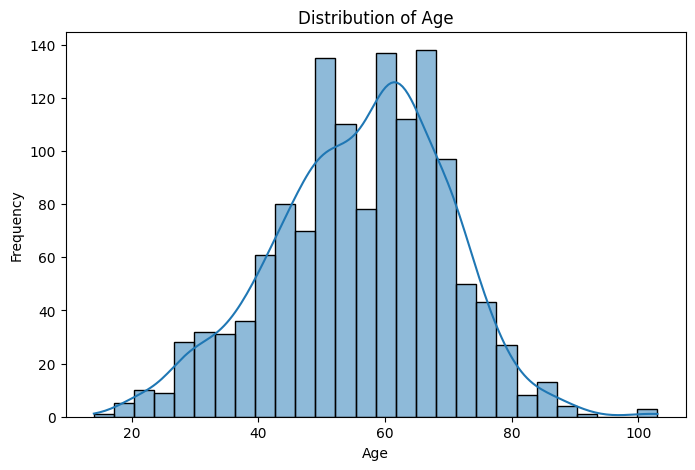

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Visualize the distribution of 'Age'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


X = df.drop('Result', axis=1)
y = df['Result']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7992424242424242
Confusion Matrix:
[[ 70  31]
 [ 22 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.80      0.80      0.80       264



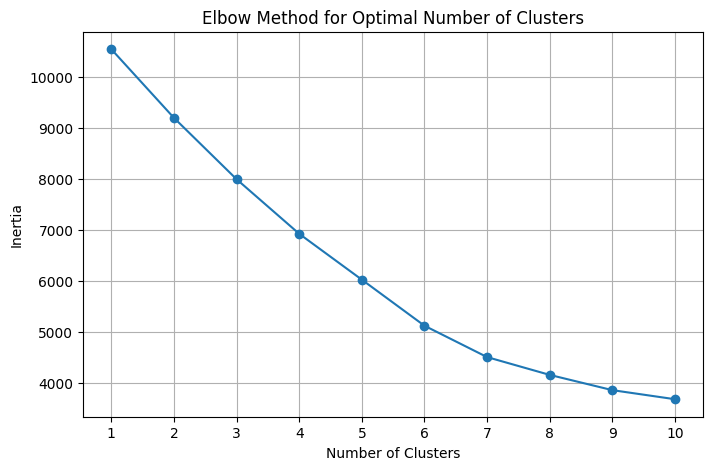

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded into 'df' and scaled into 'X' from previous steps
# If not, you would need to run the data loading and scaling cells first.

# Determine the optimal number of clusters using the elbow method
inertia = []
# Let's try a range of cluster numbers, for example from 1 to 10
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Decision Tree Accuracy: 0.9772727272727273
Decision Tree Confusion Matrix:
[[ 98   3]
 [  3 160]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



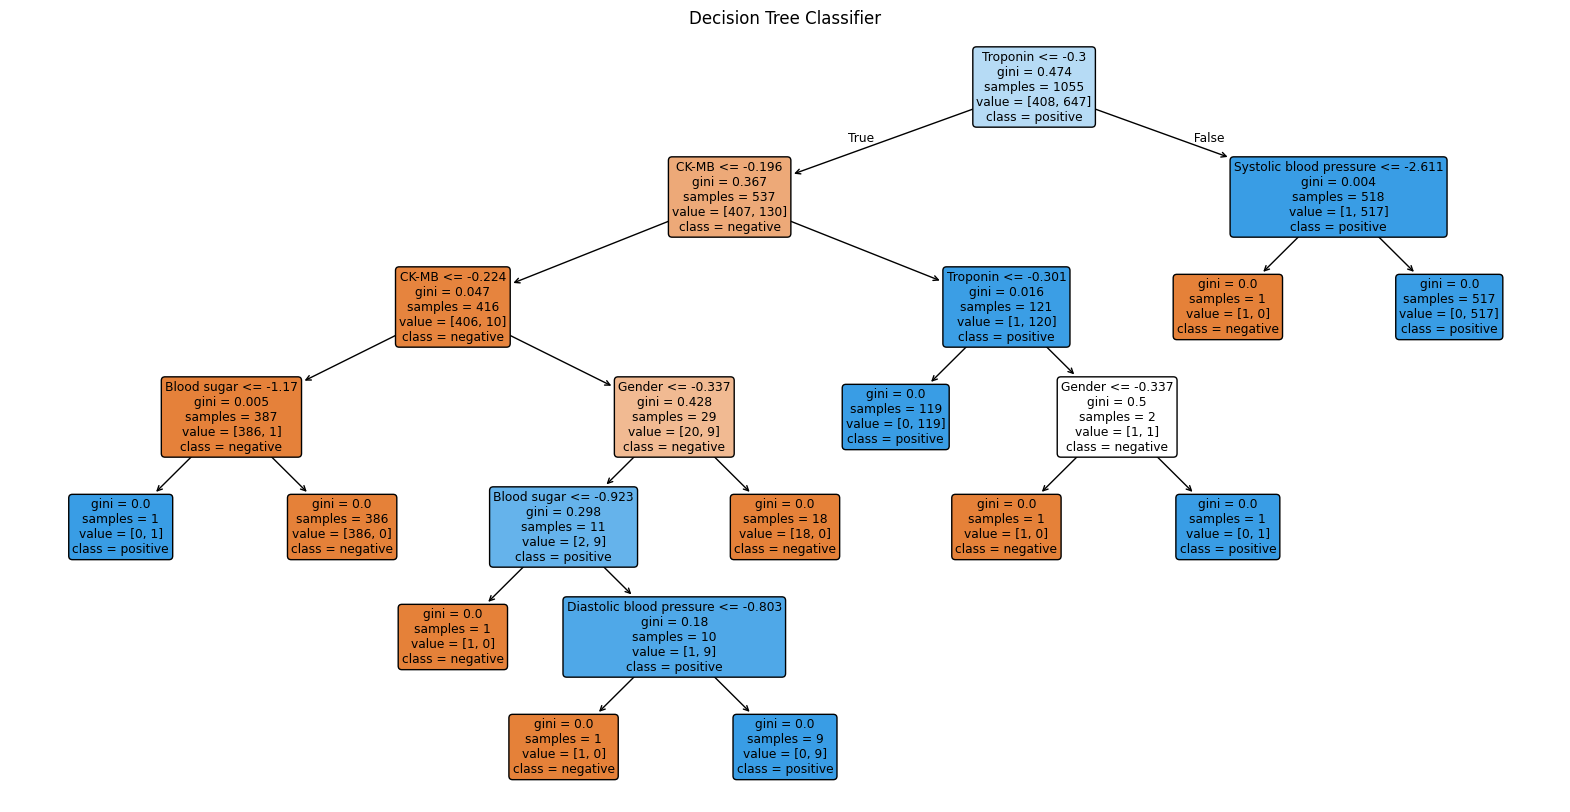

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps
# If not, you would need to run the data splitting cell first.

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}")
print(f"Decision Tree Classification Report:\n{class_report_dt}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=df.drop('Result', axis=1).columns, class_names=['negative', 'positive'], rounded=True)
plt.title('Decision Tree Classifier')
plt.show()

Random Forest Accuracy: 0.9810606060606061
Random Forest Confusion Matrix:
[[ 98   3]
 [  2 161]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



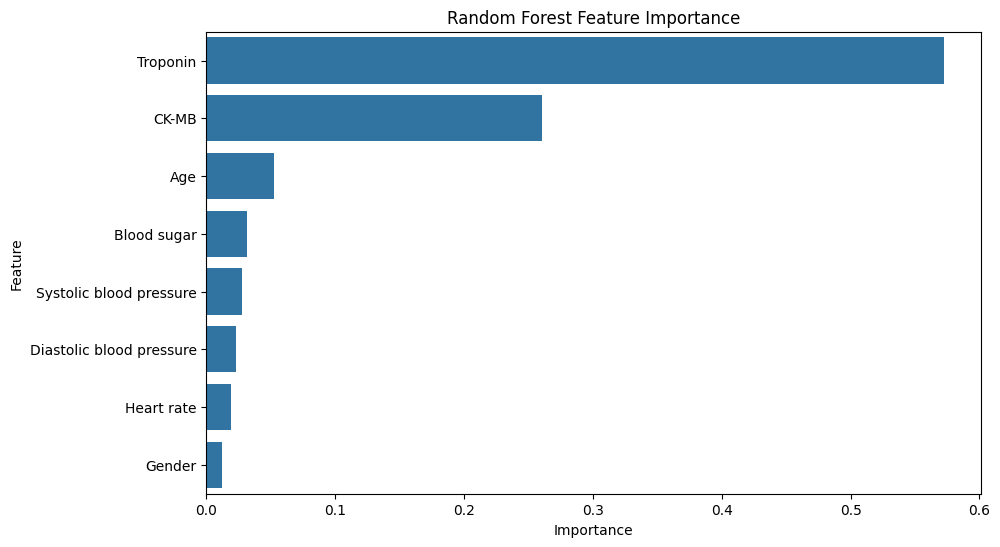

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps
# If not, you would need to run the data splitting cell first.

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{class_report_rf}")

# Visualize Feature Importance
feature_importances = pd.Series(random_forest_model.feature_importances_, index=df.drop('Result', axis=1).columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps
# If not, you would need to run the data splitting cell first.

# Initialize and train the SVM model
# Using a linear kernel as a starting point
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy (Linear Kernel): {accuracy_svm}")
print(f"SVM Confusion Matrix (Linear Kernel):\n{conf_matrix_svm}")
print(f"SVM Classification Report (Linear Kernel):\n{class_report_svm}")

SVM Accuracy (Linear Kernel): 0.7954545454545454
SVM Confusion Matrix (Linear Kernel):
[[ 75  26]
 [ 28 135]]
SVM Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       101
           1       0.84      0.83      0.83       163

    accuracy                           0.80       264
   macro avg       0.78      0.79      0.78       264
weighted avg       0.80      0.80      0.80       264



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps
# If not, you would need to run the data splitting cell first.

# Initialize and train the KNN model
# Using a common starting point like k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f"KNN Accuracy (k=5): {accuracy_knn}")
print(f"KNN Confusion Matrix (k=5):\n{conf_matrix_knn}")
print(f"KNN Classification Report (k=5):\n{class_report_knn}")

KNN Accuracy (k=5): 0.6628787878787878
KNN Confusion Matrix (k=5):
[[ 53  48]
 [ 41 122]]
KNN Classification Report (k=5):
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       101
           1       0.72      0.75      0.73       163

    accuracy                           0.66       264
   macro avg       0.64      0.64      0.64       264
weighted avg       0.66      0.66      0.66       264



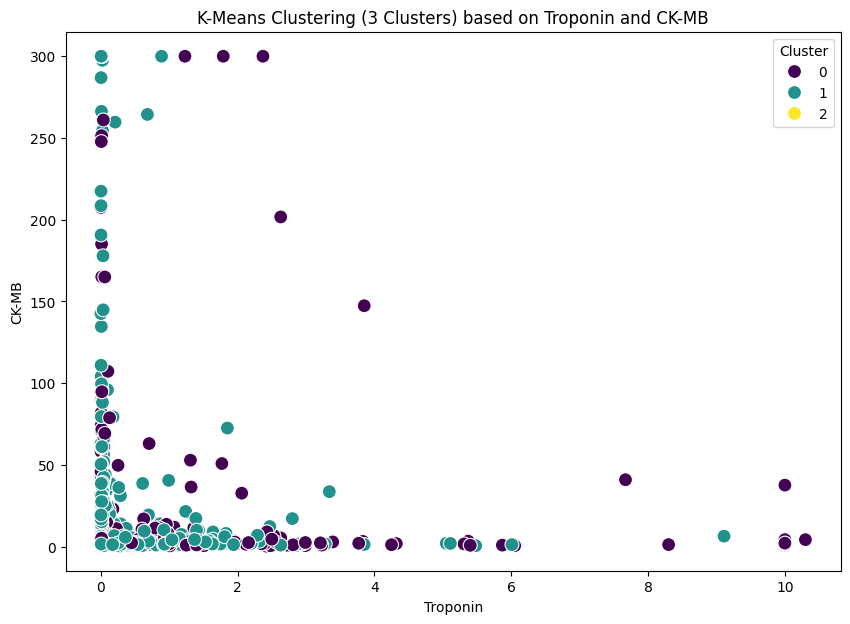

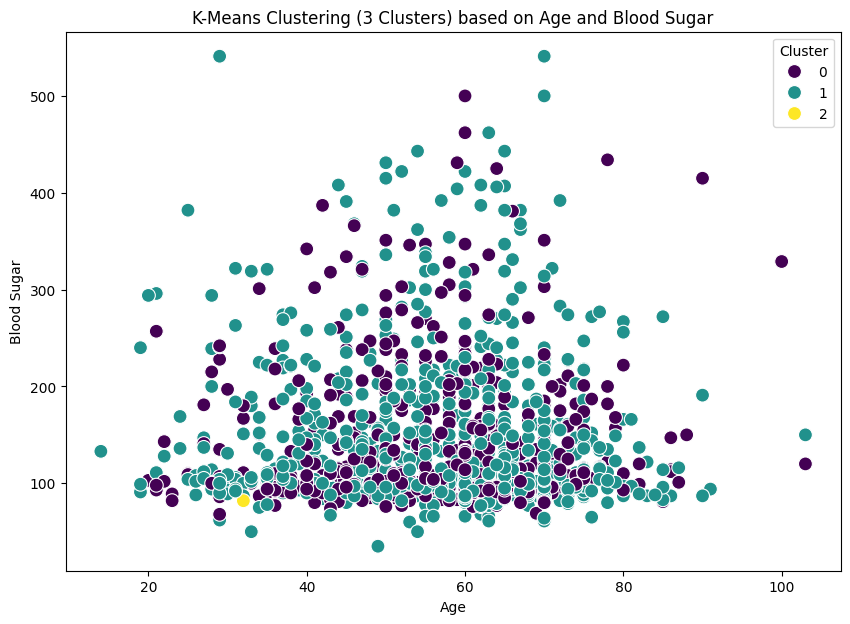

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X is the scaled feature data from previous steps
# Assuming df is the original DataFrame

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame for visualization
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Visualize the clusters based on two important features (e.g., Troponin and CK-MB)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered, x='Troponin', y='CK-MB', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (3 Clusters) based on Troponin and CK-MB')
plt.xlabel('Troponin')
plt.ylabel('CK-MB')
plt.show()

# You can also visualize clusters based on other feature combinations
# For example, Age and Blood Sugar
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered, x='Age', y='Blood sugar', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (3 Clusters) based on Age and Blood Sugar')
plt.xlabel('Age')
plt.ylabel('Blood Sugar')
plt.show()

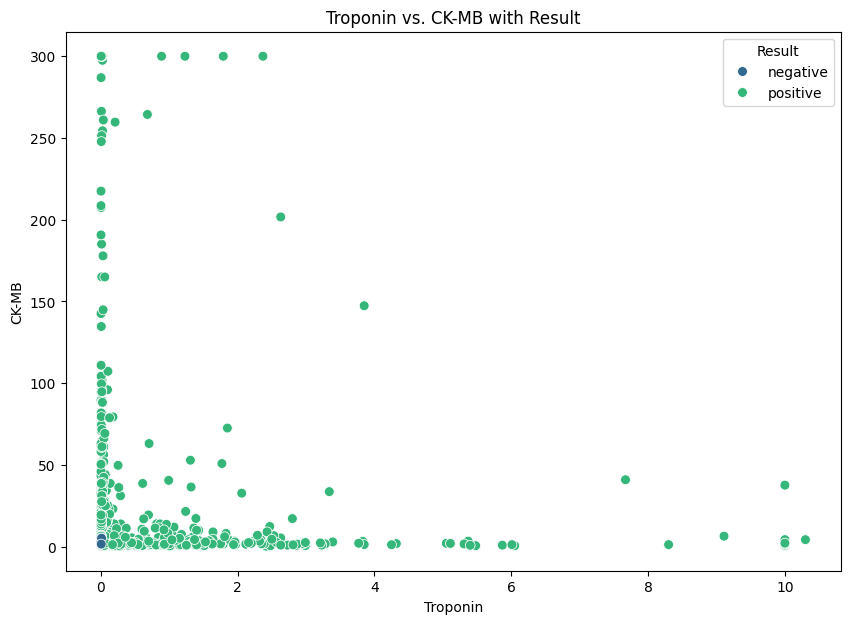

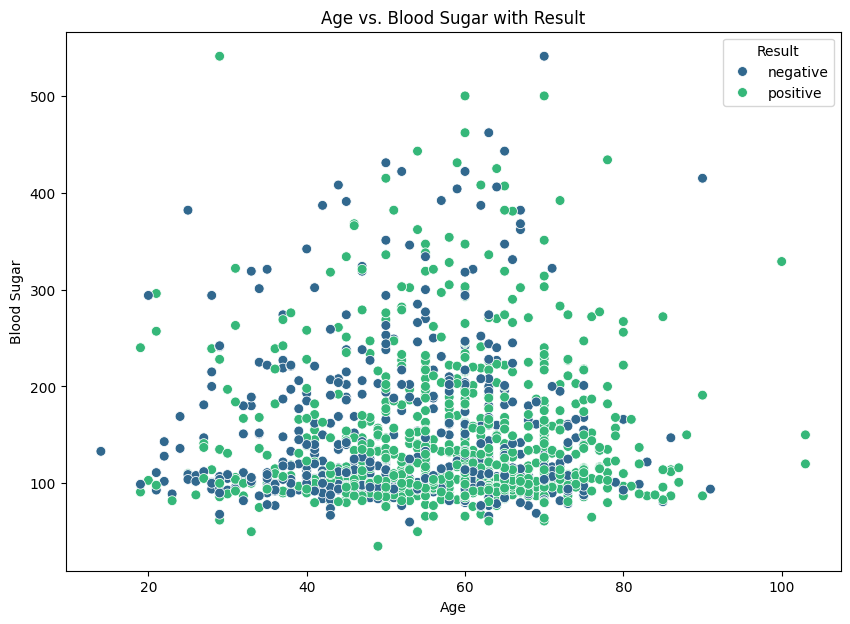

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the original DataFrame loaded in previous steps

# Visualize the relationship between two relevant features, e.g., Troponin and CK-MB
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Troponin', y='CK-MB', hue='Result', palette='viridis', s=50)
plt.title('Troponin vs. CK-MB with Result')
plt.xlabel('Troponin')
plt.ylabel('CK-MB')
plt.show()

# Visualize the relationship between another pair of relevant features, e.g., Age and Blood Sugar
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Age', y='Blood sugar', hue='Result', palette='viridis', s=50)
plt.title('Age vs. Blood Sugar with Result')
plt.xlabel('Age')
plt.ylabel('Blood Sugar')
plt.show()

# You can add more scatter plots for other feature pairs as needed

Silhouette Score for 3 Clusters: 0.16720394366617877
Clusters: 2, Silhouette Score: 0.1696, Computation Time: 0.0208 seconds
Clusters: 3, Silhouette Score: 0.1672, Computation Time: 0.0689 seconds
Clusters: 4, Silhouette Score: 0.1860, Computation Time: 0.0415 seconds
Clusters: 5, Silhouette Score: 0.2387, Computation Time: 0.0493 seconds
Clusters: 6, Silhouette Score: 0.2253, Computation Time: 0.0523 seconds
Clusters: 7, Silhouette Score: 0.2347, Computation Time: 0.0783 seconds
Clusters: 8, Silhouette Score: 0.2041, Computation Time: 0.0662 seconds
Clusters: 9, Silhouette Score: 0.2071, Computation Time: 0.0639 seconds
Clusters: 10, Silhouette Score: 0.1919, Computation Time: 0.0761 seconds


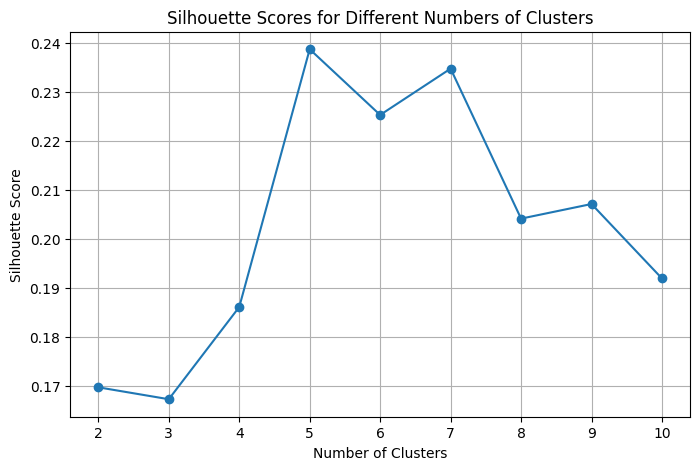

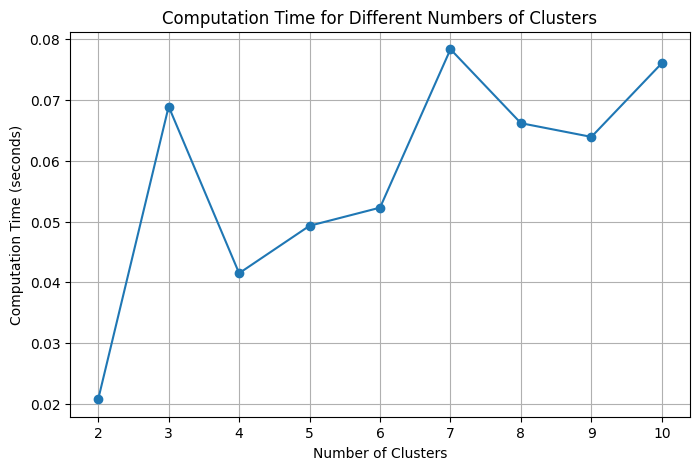

In [ ]:
from sklearn.metrics import silhouette_score
import time

# Assuming X is the scaled feature data from previous steps

# Calculate silhouette score for the 3-cluster solution
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score for 3 Clusters: {silhouette_avg}")

# Iterate to find the optimal number of clusters and measure computation time
silhouette_scores = []
computation_times = []
cluster_range = range(2, 11) # Start from 2 as silhouette score is not defined for 1 cluster

for n_clusters in cluster_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    end_time = time.time()

    silhouette_avg = silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_avg)
    computation_times.append(end_time - start_time)

    print(f"Clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}, Computation Time: {computation_times[-1]:.4f} seconds")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Plot computation times
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, computation_times, marker='o')
plt.title('Computation Time for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Computation Time (seconds)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

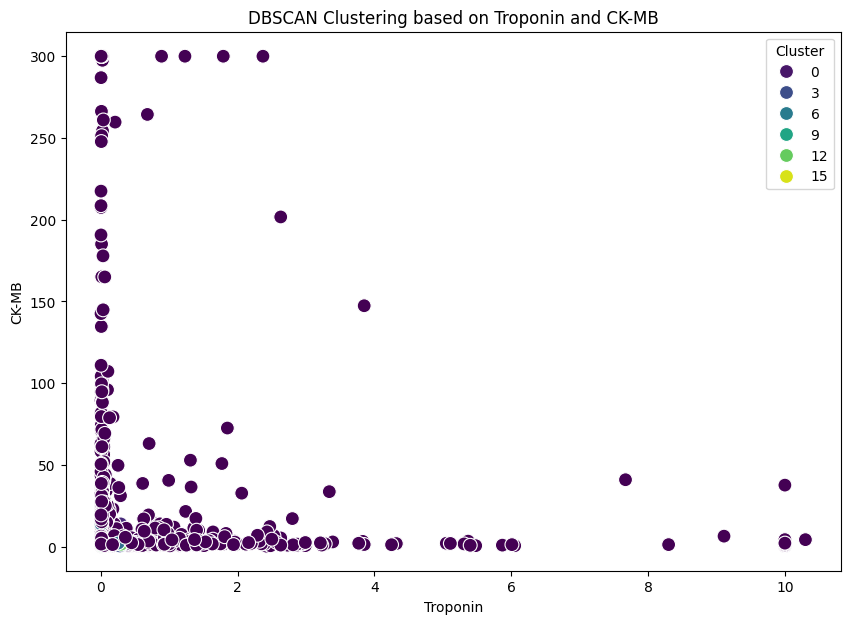

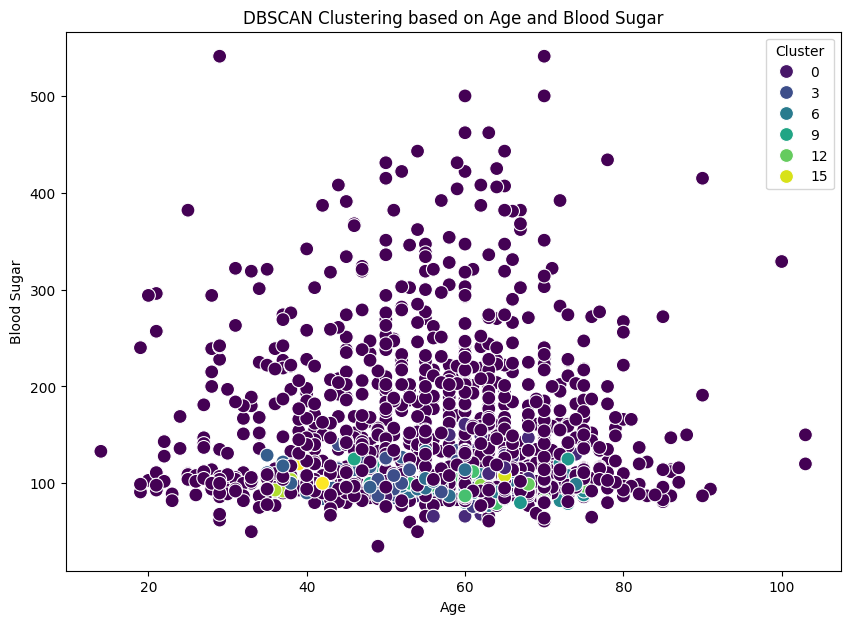

Number of clusters found: 17
Number of noise points: 1086


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X)

# Add the cluster labels to the original DataFrame for visualization
df_clustered_dbscan = df.copy()
df_clustered_dbscan['Cluster'] = clusters_dbscan

# Visualize the clusters based on two important features (e.g., Troponin and CK-MB)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered_dbscan, x='Troponin', y='CK-MB', hue='Cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering based on Troponin and CK-MB')
plt.xlabel('Troponin')
plt.ylabel('CK-MB')
plt.show()

# Visualize the clusters based on another pair of relevant features (e.g., Age and Blood Sugar)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clustered_dbscan, x='Age', y='Blood sugar', hue='Cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering based on Age and Blood Sugar')
plt.xlabel('Age')
plt.ylabel('Blood Sugar')
plt.show()

# Print the number of clusters found (excluding noise, labeled as -1)
n_clusters_dbscan = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
n_noise = list(clusters_dbscan).count(-1)

print(f"Number of clusters found: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")


In [ ]:
import pandas as pd


accuracy_scores = {
    'Logistic Regression': accuracy,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'SVM (Linear Kernel)': accuracy_svm,
    'KNN (k=5)': accuracy_knn
}

# Create a pandas Series from the dictionary and sort by accuracy
accuracy_series = pd.Series(accuracy_scores).sort_values(ascending=False)

print("Classification Model Accuracy Comparison:")
print(accuracy_series)



Classification Model Accuracy Comparison:
Random Forest          0.981061
Decision Tree          0.977273
Logistic Regression    0.799242
SVM (Linear Kernel)    0.795455
KNN (k=5)              0.662879
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train and y_train are already defined from previous steps

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
class_report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

print(f"\nTuned Random Forest Accuracy on Test Set: {accuracy_tuned_rf}")
print(f"Tuned Random Forest Classification Report on Test Set:\n{class_report_tuned_rf}")

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy:  0.9876777251184834

Tuned Random Forest Accuracy on Test Set: 0.9810606060606061
Tuned Random Forest Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import time
import numpy as np


eps_range = [0.3, 0.5, 0.7, 1.0]
min_samples_range = [3, 5, 7, 10]

results = []

for eps in eps_range:
    for min_samples in min_samples_range:
        start_time = time.time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters_dbscan = dbscan.fit_predict(X)
        end_time = time.time()

        n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
        n_noise = list(clusters_dbscan).count(-1)

        silhouette_avg = -1 # Initialize silhouette score to -1
        # Calculate silhouette score only if there are more than 1 cluster and not all points are noise
        if n_clusters > 1 and n_clusters + n_noise < len(X):
            silhouette_avg = silhouette_score(X, clusters_dbscan)


        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette_score': silhouette_avg,
            'computation_time': end_time - start_time
        })

# Print the results
print("DBSCAN Parameter Tuning Results:")
for result in results:
    print(f"  eps: {result['eps']:.2f}, min_samples: {result['min_samples']}, Clusters: {result['n_clusters']}, Noise: {result['n_noise']}, Silhouette Score: {result['silhouette_score']:.4f}, Time: {result['computation_time']:.4f}s")



DBSCAN Parameter Tuning Results:
  eps: 0.30, min_samples: 3, Clusters: 7, Noise: 1292, Silhouette Score: -0.4349, Time: 0.0330s
  eps: 0.30, min_samples: 5, Clusters: 0, Noise: 1319, Silhouette Score: -1.0000, Time: 0.0464s
  eps: 0.30, min_samples: 7, Clusters: 0, Noise: 1319, Silhouette Score: -1.0000, Time: 0.0450s
  eps: 0.30, min_samples: 10, Clusters: 0, Noise: 1319, Silhouette Score: -1.0000, Time: 0.0305s
  eps: 0.50, min_samples: 3, Clusters: 32, Noise: 930, Silhouette Score: -0.4094, Time: 0.0373s
  eps: 0.50, min_samples: 5, Clusters: 17, Noise: 1086, Silhouette Score: -0.3660, Time: 0.0562s
  eps: 0.50, min_samples: 7, Clusters: 8, Noise: 1203, Silhouette Score: -0.3891, Time: 0.0557s
  eps: 0.50, min_samples: 10, Clusters: 3, Noise: 1269, Silhouette Score: -0.3263, Time: 0.0556s
  eps: 0.70, min_samples: 3, Clusters: 15, Noise: 533, Silhouette Score: -0.2982, Time: 0.0645s
  eps: 0.70, min_samples: 5, Clusters: 10, Noise: 624, Silhouette Score: -0.2679, Time: 0.0691s
  ep

/tmp/ipython-input-2366723079.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis')


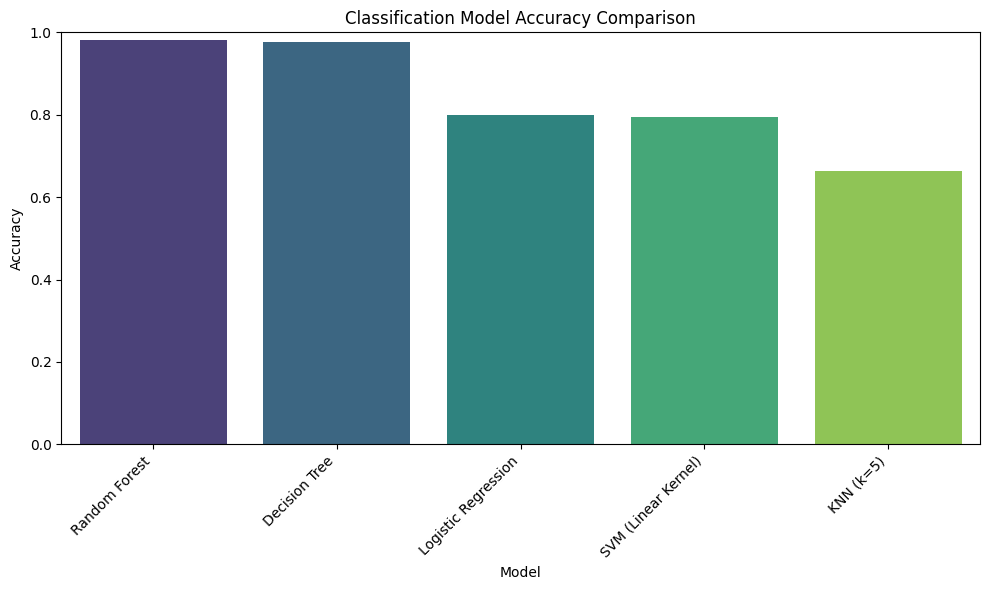

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


accuracy_series = pd.Series(accuracy_scores).sort_values(ascending=False)

# Create a bar plot of the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values, palette='viridis')
plt.title('Classification Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()